In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
rating = pd.read_csv('jester-data-1.csv', header=None)
rating.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
rating = rating.replace(99, np.nan)

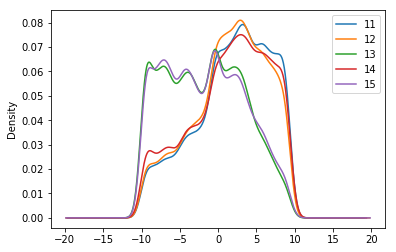

In [6]:
rating[[11, 12, 13, 14, 15]].plot(kind='kde')

In [93]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [186]:
# this is the size of our encoded representations
encoding_dim = 256

# this is our input placeholder
x = Input(shape=(100,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', use_bias=False)(x)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(100, activation='sigmoid', use_bias=False)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(x, decoded)

In [187]:
# this model maps an input to its encoded representation
encoder = Model(x, encoded)

In [188]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [189]:
autoencoder.compile(optimizer='adadelta', loss='mean_absolute_error')

In [190]:
without_counts = rating.as_matrix()[:, 1:]

In [191]:
# normalize between 0 and 1
normed_data = (without_counts + 10.01) / 20.01

In [192]:
normed_data = np.nan_to_num(normed_data)

In [193]:
np.random.shuffle(normed_data)
training, test = normed_data[:22000,:], normed_data[22000:,:]

In [194]:
from keras.callbacks import TensorBoard

In [195]:
datestr = str(datetime.now()).replace(':', '-').split('.')[0]

autoencoder.fit(training, training,
                epochs=1000,
                verbose=2,
                batch_size=256,
                validation_data=(test, test),
                callbacks=[TensorBoard(log_dir='tmp\\deep-layers1-nodes' + str(encoding_dim) + datestr)])

Train on 20000 samples, validate on 4983 samples
Epoch 1/500
0s - loss: 0.2742 - val_loss: 0.2428
Epoch 2/500
0s - loss: 0.2240 - val_loss: 0.2105
Epoch 3/500
0s - loss: 0.1960 - val_loss: 0.1868
Epoch 4/500
0s - loss: 0.1780 - val_loss: 0.1743
Epoch 5/500
0s - loss: 0.1687 - val_loss: 0.1675
Epoch 6/500
0s - loss: 0.1630 - val_loss: 0.1627
Epoch 7/500
0s - loss: 0.1588 - val_loss: 0.1591
Epoch 8/500
0s - loss: 0.1557 - val_loss: 0.1564
Epoch 9/500
0s - loss: 0.1533 - val_loss: 0.1543
Epoch 10/500
0s - loss: 0.1514 - val_loss: 0.1524
Epoch 11/500
0s - loss: 0.1496 - val_loss: 0.1508
Epoch 12/500
0s - loss: 0.1480 - val_loss: 0.1492
Epoch 13/500
0s - loss: 0.1464 - val_loss: 0.1477
Epoch 14/500
0s - loss: 0.1449 - val_loss: 0.1462
Epoch 15/500
0s - loss: 0.1435 - val_loss: 0.1449
Epoch 16/500
0s - loss: 0.1421 - val_loss: 0.1434
Epoch 17/500
0s - loss: 0.1407 - val_loss: 0.1421
Epoch 18/500
0s - loss: 0.1394 - val_loss: 0.1408
Epoch 19/500
0s - loss: 0.1382 - val_loss: 0.1395
Epoch 20/5

In [217]:
autoencoder.layers[1].get_weights()

[array([[-0.14063662,  0.22991805, -0.10679375, ...,  0.01985111,
         -0.18247424,  0.01726304],
        [ 0.23617499,  0.15524763, -0.09287915, ..., -0.08952167,
         -0.40475476, -0.10638523],
        [ 0.07987978,  0.09629168, -0.0569509 , ..., -0.07145556,
         -0.05175972, -0.01627394],
        ..., 
        [ 0.07680829, -0.37096223,  0.08373161, ..., -0.11003507,
          0.14870681, -0.06757215],
        [-0.16988041, -0.16605206, -0.0979751 , ..., -0.06839992,
         -0.09939238,  0.02283013],
        [ 0.01475278,  0.35505906, -0.08086412, ...,  0.018603  ,
          0.0387192 , -0.08621925]], dtype=float32)]

In [218]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test)
decoded_imgs = decoder.predict(encoded_imgs)

In [219]:
import matplotlib.pyplot as plt

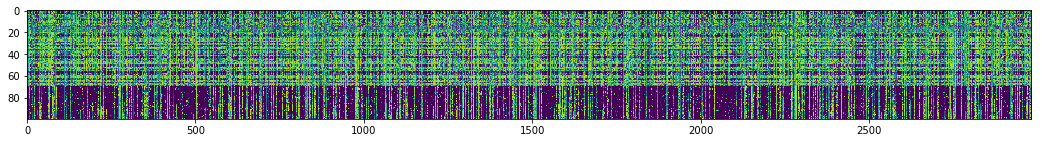

In [220]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(decoded_imgs.transpose(), aspect='auto')

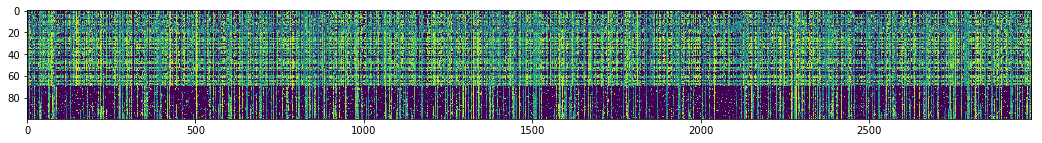

In [221]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(test.transpose(), aspect='auto')

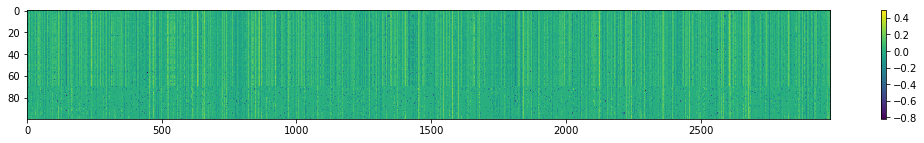

In [224]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow((decoded_imgs-test).transpose(), aspect='auto')
plt.colorbar()

In [225]:
liked = np.round(decoded_imgs/0.25)
test_liked = np.round(test/0.25)

In [226]:
# Rough accuracy
sum(sum(liked == test_liked))/(liked.shape[0]*liked.shape[1])

0.79971505196111292

In [227]:
# Score error
sum(sum(abs(test_liked-liked))/(liked.shape[0]*liked.shape[1]))

0.20362386858866921